<a href="https://colab.research.google.com/github/farhadhsn8/Heart-Disease-Prediction-using-Machine-Learning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LogisticRegression

In [ ]:
from numpy import genfromtxt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
dataset = genfromtxt('heart.csv', delimiter=',')
dataset = dataset[1:]
dataset.shape

(303, 14)

In [ ]:


# ---------K_FOLD CROSS VALIDATION --------------------
from sklearn.linear_model import LogisticRegression
X = dataset[:,0:-1]
Y = dataset[:,-1]

kf = KFold(n_splits=10 , random_state=None, shuffle=True) # ====> K = 10
kf.get_n_splits(X)
acc=[]


for train_index, test_index in kf.split(X):
    clf = LogisticRegression()
    clf = clf.fit(X[train_index], Y[train_index])     
    y_pred = clf.predict( X[test_index])
    cm = confusion_matrix(Y[test_index], y_pred)
    true = np.diag(cm)
    accuricy = np.sum(true)/np.sum(cm)
    acc.append(accuricy)

print('\n\n  K_FOLD CROSS VALIDATION ACC IS : ',str( sum(acc) / len(acc) * 100 )+' % ' , '\n\n')




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




  K_FOLD CROSS VALIDATION ACC IS :  83.88172043010753 %  




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
def computeAccuricy(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)


  df_cm = pd.DataFrame(cm,['not disease','disease'],['not disease','disease'])
  plt.figure(figsize = (10,8))
  sns.heatmap(df_cm, annot=True ,  cmap='Blues')


  true = np.diag(cm)
  accuricy = np.sum(true)/np.sum(cm)
  precision = cm[ 1 , 1 ]/np.sum(cm[1])
  recall = cm[ 1 , 1 ]/np.sum(cm[: , 1])
  measure = (2 * recall * precision) / (recall + precision)
  print('accuricy : ',str(accuricy * 100 )+' % ' , '\n\n')
  print('precision : ',str(precision * 100 )+' % ' , '\n\n')
  print('recall : ',str(recall * 100 )+' % ' , '\n\n')
  print('F-measure : '  ,str(measure * 100 )+' % ' , '\n\n')

In [ ]:
#---------------shuffle---------------------
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.shape

#-------------test & train ---------------
train=dataset[0:280,:]    
test=dataset[280:,:]  
test.shape                #(23, 14)
train.shape              # (280, 14)

(280, 14)

In [ ]:
X = train[:,0:-1]
Y = train[:,-1]
clf = LogisticRegression()
clf = clf.fit(X , Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuricy :  85.71428571428571 %  


precision :  91.44736842105263 %  


recall :  83.73493975903614 %  


F-measure :  87.42138364779875 %  




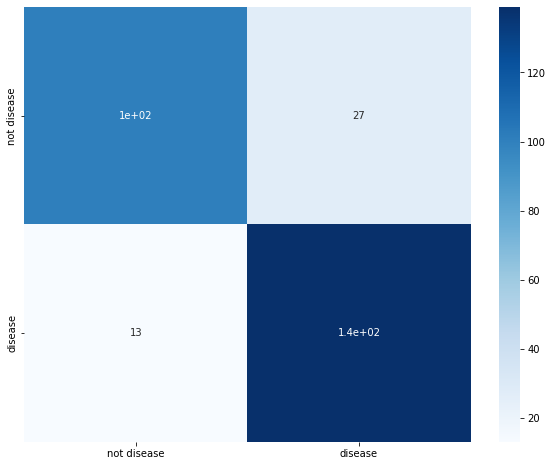

In [ ]:
y_pred_train = clf.predict(train[:, 0:-1])
y_true_train = train[:,-1]

computeAccuricy( y_true_train , y_pred_train  )

accuricy :  82.6086956521739 %  


precision :  92.3076923076923 %  


recall :  80.0 %  


F-measure :  85.71428571428571 %  




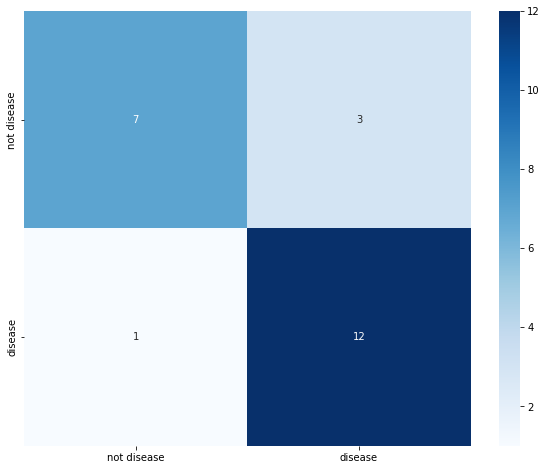

In [ ]:
y_pred_test = clf.predict(test[:, 0:-1])
y_true_test = test[:,-1]

computeAccuricy(y_true_test , y_pred_test )